# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [3]:
data

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
...,...,...,...,...,...,...,...,...
195,196,11.95,3.13,2.97,67.18,0.80,2.06,3847.571003
196,197,17.99,9.87,3.38,44.32,0.98,2.08,5601.227131
197,198,12.12,2.27,3.52,57.07,-0.04,1.73,3409.575363
198,199,15.55,4.48,2.48,58.25,1.89,2.35,5087.592149


### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [4]:
data.corr()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


<Axes: >

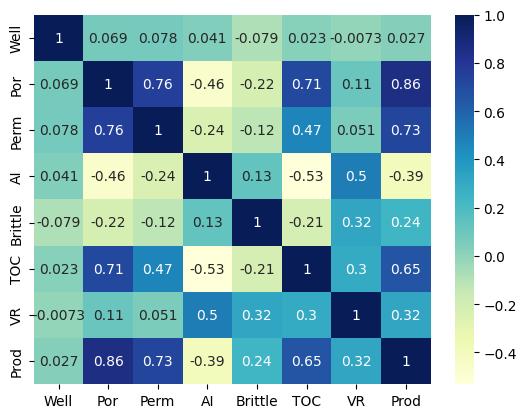

In [5]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [6]:
det = np.linalg.det(data.corr())
print(det)

0.0007299388072652082


In [7]:
r = np.linalg.matrix_rank(data.corr())
print(r)

8


Сильнее всего коррелируют Por, Perm, и TOC

Корреляционная матрица является плохо обусловенной (её опредитель близок к нулю)

Существует мультиколлинеарность в данных: переменные Por и Perm, Por и TOC имеют корреляцию > 0.7. Таким образом, модель классической линейной регрессии по методу наименьших квадратов здесь неприменима, так как это противоречит предпосылкам МНК

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [8]:
data

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
...,...,...,...,...,...,...,...,...
195,196,11.95,3.13,2.97,67.18,0.80,2.06,3847.571003
196,197,17.99,9.87,3.38,44.32,0.98,2.08,5601.227131
197,198,12.12,2.27,3.52,57.07,-0.04,1.73,3409.575363
198,199,15.55,4.48,2.48,58.25,1.89,2.35,5087.592149


In [9]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [10]:
w = (np.linalg.inv(X.T@X))@X.T@y

In [11]:
dict(zip(data.columns[:-1], w.astype(int)))

{'Well': 0,
 'Por': 184,
 'Perm': 157,
 'AI': -675,
 'Brittle': 19,
 'TOC': -272,
 'VR': 1124}

Признак Well, как и ожидалось, абсолютно неинформативен. Признак VR в значительной степени влияет на модель, чем он больше, тем сильно больше целевая перменная. Признак AI также сильно влияет на целевую перменную, но чем больше он, тем меньше целевая переменная

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [12]:
X_test = {   'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }

In [13]:
prediction = (list(X_test.values()) @ w).sum()
prediction

4631.708570600847

In [14]:
AE = np.abs(4748.315024 - prediction)
AE

116.606453399153

In [15]:
MAE = (np.abs((X @ w) - y)).sum() / X.shape[0]
MAE

171.35279594519662

Выбрана метрика MAE, средняя абсолютная ошибка модели - 171.35

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [16]:
dict(zip(data.columns[:-1], w.astype(int)))

{'Well': 0,
 'Por': 184,
 'Perm': 157,
 'AI': -675,
 'Brittle': 19,
 'TOC': -272,
 'VR': 1124}

In [17]:
data.corr().iloc[:-1, -1]

Well       0.026817
Por        0.861910
Perm       0.727426
AI        -0.390835
Brittle    0.237155
TOC        0.654445
VR         0.323182
Name: Prod, dtype: float64

Переменная TOC имеет положительную достаточно сильную корреляцию 0.65, но модель дала ей отрицательный вес -272. Вероятно, это связано с мультиколлинеарностью в данных

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [18]:
X = data[['Por', 'AI', 'Brittle', 'VR']].values

In [19]:
w = (np.linalg.inv(X.T@X))@X.T@y

In [20]:
dict(zip(['Por', 'AI', 'Brittle', 'VR'], w.astype(int)))

{'Por': 235, 'AI': -486, 'Brittle': 22, 'VR': 598}

In [21]:
data.corr().iloc[:-1, -1][['Por', 'AI', 'Brittle', 'VR']]

Por        0.861910
AI        -0.390835
Brittle    0.237155
VR         0.323182
Name: Prod, dtype: float64

In [22]:
MAE = (np.abs((X @ w) - y)).sum() / X.shape[0]
MAE

216.9388722947506

Por сильно коррелирует с Perm и TOC, но имеет наивысшую корреляцию с целевой переменной, поэтому удалим Perm и TOC. Well имеет корреляцию менее 0.05, его тоже удаляем.

Коэффециенты в целом стали меньше. VR сильно влияет на целевую переменную и при его увеличении целевая перменная сильно увеличивается, AI отрицательно сильно влияет на целевую переменную, при его увеличении целевая переменная сильно уменьшается.

Ошибка стала чуть больше, но теперь коэффициенты нормально соотносятся с корреляцией.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [25]:
dict(zip(['Por', 'AI', 'Brittle', 'VR'], model.coef_.astype(int)))

{'Por': 235, 'AI': -486, 'Brittle': 22, 'VR': 598}

In [26]:
MAE = (np.abs(model.predict(X) - y)).sum() / X.shape[0]
MAE

216.93887229475092

Коэффициенты и ошибка полностью совпадают с ручной реализацией

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [27]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
pf = PolynomialFeatures(degree=3, include_bias=False)
X_scaled_third = pf.fit_transform(X_scaled)

In [30]:
X_scaled_third.shape

(200, 34)

In [31]:
model = LinearRegression()

In [32]:
results_pol = cross_validate(model, X_scaled_third, y, scoring='neg_mean_absolute_error', return_train_score=True)
results_pol

{'fit_time': array([0.00129914, 0.00067759, 0.00061035, 0.00102448, 0.00099921]),
 'score_time': array([0.00029802, 0.00025725, 0.00024295, 0.0004611 , 0.00041747]),
 'test_score': array([ -94.02220418, -108.34790225, -102.57805078, -122.46023673,
        -124.95965335]),
 'train_score': array([-78.70375473, -75.7626024 , -75.94245648, -72.47800221,
        -73.83973328])}

In [33]:
for x in results_pol:
    print(f'{x}: {np.mean(results_pol[x])}')

fit_time: 0.0009221553802490235
score_time: 0.0003353595733642578
test_score: -110.47360945494026
train_score: -75.3453098216487


Получилось 34 признака, train MAE лежит стабильно недалеко от 75, test MAE имеет более сильный разброс, от 94 до 124 со средним значением в 110. Модель может быть переобучена

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [34]:
param_grid = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
model = Lasso()
gr = GridSearchCV(model, param_grid)
gr.fit(X_scaled_third, y)

/home/nekita473/anaconda3/envs/vision/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.485e+05, tolerance: 1.612e+04
  model = cd_fast.enet_coordinate_descent(
/home/nekita473/anaconda3/envs/vision/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.235e+05, tolerance: 1.545e+04
  model = cd_fast.enet_coordinate_descent(
/home/nekita473/anaconda3/envs/vision/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                   0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]})

In [35]:
model = Lasso(alpha=5)

In [36]:
results_lasso = cross_validate(model, X_scaled_third, y, scoring='neg_mean_absolute_error', return_train_score=True)
results_lasso

{'fit_time': array([0.00113297, 0.00090933, 0.00076485, 0.00078106, 0.00090003]),
 'score_time': array([0.00029755, 0.00027966, 0.00023341, 0.00027871, 0.00029969]),
 'test_score': array([ -80.20027498,  -88.00925078,  -92.64718307, -100.99945474,
        -116.61835111]),
 'train_score': array([-80.37457786, -79.15966726, -78.35374296, -77.24610473,
        -76.35834732])}

In [37]:
for x in results_lasso:
    print(f'{x}: {np.mean(results_lasso[x])}')

fit_time: 0.0008976459503173828
score_time: 0.00027780532836914064
test_score: -95.69490293534993
train_score: -78.29848802658631


Разница между трейном и тестом значительно уменьшилась, среднее значение трейна повысилось до 78, валидации теперь от 80 до 116 со средним 95. Модель гораздно меньше переобучена. Лучший параметр alpha = 5

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [38]:
param_grid = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
model = Ridge()
gr = GridSearchCV(model, param_grid)
gr.fit(X_scaled_third, y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                   0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]})

In [39]:
model = Ridge(alpha=1)

In [40]:
results_ridge = cross_validate(model, X_scaled_third, y, scoring='neg_mean_absolute_error', return_train_score=True)
results_ridge

{'fit_time': array([0.00054312, 0.0004046 , 0.00042248, 0.00038934, 0.00038576]),
 'score_time': array([0.00023675, 0.00021172, 0.00020766, 0.00020671, 0.00020242]),
 'test_score': array([ -95.13765718, -105.57315906, -101.9325031 , -120.75534331,
        -134.000998  ]),
 'train_score': array([-80.77790779, -77.78153675, -77.25734758, -74.48359159,
        -75.86109265])}

In [41]:
for x in results_ridge:
    print(f'{x}: {np.mean(results_ridge[x])}')

fit_time: 0.00042905807495117185
score_time: 0.00021305084228515626
test_score: -111.4799321332381
train_score: -77.23229526984821


Здесь результаты хуже: train и val снова далеки друг от друга: 77 против 111

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [42]:
param_grid = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
              'l1_ratio': np.arange(0, 1.01, 0.05)}
model = ElasticNet()
gr = GridSearchCV(model, param_grid)
gr.fit(X_scaled_third, y)

/home/nekita473/anaconda3/envs/vision/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.575e+05, tolerance: 1.612e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/nekita473/anaconda3/envs/vision/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.328e+05, tolerance: 1.545e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                   0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])})

In [43]:
model = ElasticNet(alpha=5, l1_ratio=1.0)

In [44]:
results_elastic = cross_validate(model, X_scaled_third, y, scoring='neg_mean_absolute_percentage_error', return_train_score=True)
results_elastic

{'fit_time': array([0.00292468, 0.00184917, 0.00126696, 0.0009222 , 0.00080204]),
 'score_time': array([0.00073433, 0.00043654, 0.00034738, 0.00029755, 0.00023866]),
 'test_score': array([-0.02019102, -0.02062533, -0.02198242, -0.02286118, -0.02814795]),
 'train_score': array([-0.01857512, -0.01861688, -0.01841113, -0.01811365, -0.01767974])}

In [45]:
for x in results_elastic:
    print(f'{x}: {np.mean(results_elastic[x])}')

fit_time: 0.0015530109405517579
score_time: 0.00041089057922363283
test_score: -0.022761580665436425
train_score: -0.01827930571951012


В среднем 1.8% ошибка на трейне и 2.2% на вале, что является очень хорошим результатом

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [46]:
results_elastic_mae = cross_validate(model, X_scaled_third, y, scoring='neg_mean_absolute_error', return_train_score=True)

In [47]:
final_df = pd.DataFrame()
names = ['Linear', 'Lasso', 'Ridge', 'Elastic']
hyperparams = ['', 'alpha=5', 'alpha=1', 'alpha=5, l1-ration=1']
polynomial_features = [True]*4
train_mae = [np.mean(results_pol['train_score']), np.mean(results_lasso['train_score']),
             np.mean(results_ridge['train_score']), np.mean(results_elastic_mae['train_score'])]
test_mae = [np.mean(results_pol['test_score']), np.mean(results_lasso['test_score']),
           np.mean(results_ridge['test_score']), np.mean(results_elastic_mae['test_score'])]

final_df['name'] = names
final_df['hyperparams'] = hyperparams
final_df['polynomial_features'] = polynomial_features
final_df['train_MAE'] = train_mae
final_df['test_MAE'] = test_mae

In [48]:
final_df

,name,hyperparams,polynomial_features,train_MAE,test_MAE
0,Linear,,True,-75.345310,-110.473609
1,Lasso,alpha=5,True,-78.298488,-95.694903
2,Ridge,alpha=1,True,-77.232295,-111.479932
3,Elastic,"alpha=5, l1-ration=1",True,-78.298488,-95.694903


Наилучшими моделями по метрике MAE оказались Lasso и Elastic, они совпадают. Наименьшая разница train и val говорит нам о минимальном переобучении и более стабильной работе модели.